## This Notebook will be used to demonstrate the steps to build a Linear Regression Model mentioned in this blog: [Linear Regression In Machine Learning](https://www.enjoyalgorithms.com/blog/linear-regression-in-machine-learning/)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures

### Formula for generating the data: Y = -(x-1) * (x+2) * (x-3) * (x+4)

In [4]:
#creating and plotting dataset with curve-linear relationship

np.random.seed(0)

x = np.arange(-5,5,0.2) + 0.1 * np.random.normal(0,1,50)

y = -1*(x**4) - 2*(x**3) + 13*(x**2) + 14*(x) - 24 + 10 * np.random.normal(-1,1,50)

### Let's visualize the dataset once

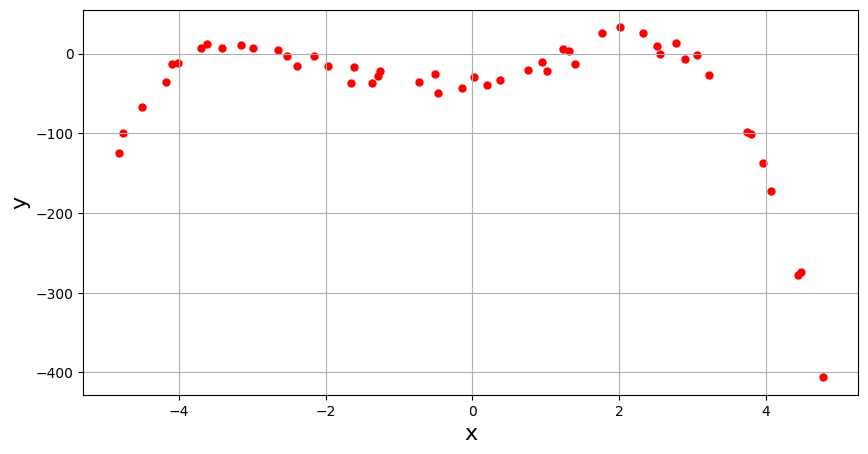

In [8]:
plt.figure(figsize=(10,5))
plt.scatter(x,y, color='red', s=25, label='data')
plt.xlabel('x',fontsize=16)
plt.ylabel('y',fontsize=16)
plt.grid()
plt.show()

### Increasing dimensionality of the data

In [6]:
def poly_data(x,y,degree):
    
    x = x[:,np.newaxis]
    y = y[:,np.newaxis]
    
    polynomial_features = PolynomialFeatures(degree=degree)
    x_poly = polynomial_features.fit_transform(x)
    
    return (x_poly,y)

### Model Formation: PolyLinearRegression 

In [9]:
def PolyLinearRegression(data, degree=1):
  
    x_poly,y = data
    
    model = LinearRegression()
    model.fit(x_poly, y) #it will fit the model
    
    y_poly_pred = model.predict(x_poly) #prediction
    
    rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
    r2 = r2_score(y,y_poly_pred)
    
    model.degree = degree
    model.RMSE = rmse
    model.r2 = r2
    return model

### Plot results

In [14]:
def Regression_plots(data,model,axis):
    
    x, y = data
    axis.plot(x[:,1], model.predict(x),
              color=color[degree==1],
              label=str("Model Degree: %d"%model.degree)
              + str("; RMSE:%.3f"%model.RMSE)
                    + str("; R2 Score: %.3f"%model.r2))
    
    axis.legend()

### Fitting various degree of polynomials on the same formed dataset

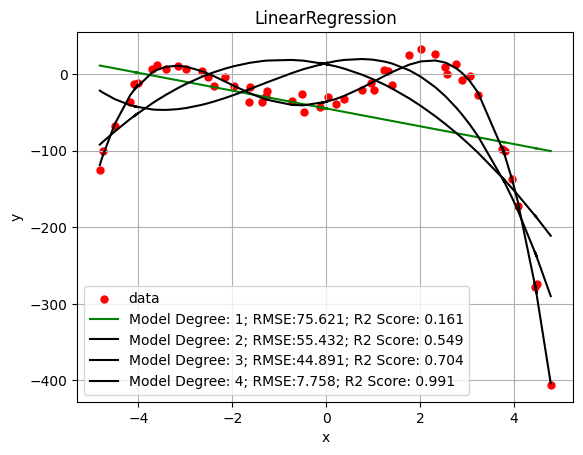

In [19]:
_,axis = plt.subplots()

color = ['black','green','blue','purple']

axis.grid()
axis.set_xlabel('x')
axis.set_ylabel('y')
axis.scatter(x[:,np.newaxis], y[:,np.newaxis], color='red',
       s=25, label='data')
axis.set_title('LinearRegression')

for degree in range(1,5):
    data = poly_data(x,y,degree = degree)
    model = PolyLinearRegression(data, degree=degree)
    Regression_plots(data,model,axis)